<div style="text-align: right">INFO 6105 Data Science Eng Methods and Tools, key words for week 3 "Probability"</div>
<div style="text-align: right">Zixiao Wang , 28 October 2019, with material from Dino Konstantopoulos</div>

# Key words for Week 3 "Probability"

You should a good understanding of ***probabilities***, ***python list comprehensions***, ***python lambda arithmetic***, and how to ***compute probabilities***.

You should a good understanding of how to estimate probabilities for outcomes of different frequency and sample spaces, and how to use Bayes' theorem to answer typical interview questions involving probabilities. You are ready for an introduction to sport analytics.

## Mathematical concept

### 1. Probability

Here's some vocabulary:

- [Experiment](https://en.wikipedia.org/wiki/Experiment_(probability_theory%29)):
  An occurrence with an uncertain outcome that we can observe.
  <br>*For example, rolling a die.*
- [Outcome](https://en.wikipedia.org/wiki/Outcome_(probability%29)):
  The result of an experiment; one particular state of the world. What Laplace calls a "case."
  <br>*For example:* `4`.
- [Sample Space](https://en.wikipedia.org/wiki/Sample_space):
  The set of all possible outcomes for the experiment. 
  <br>*For example,* `{1, 2, 3, 4, 5, 6}`.
- [Event](https://en.wikipedia.org/wiki/Event_(probability_theory%29)):
  A subset of possible outcomes that together have some property we are interested in.
  <br>*For example, the event "even die roll" is the set of outcomes* `{2, 4, 6}`. 
  

### 2. Probability Distributions

#### 2.1 Binomial Distributions

<center>
<img src="http://statistics.wdfiles.com/local--files/ch6/binomial.png" width="400" />
Binomial
</center>

For a single trial, i.e., n = 1, the binomial distribution is a **Bernoulli distribution**. 

The probability of getting exactly k successes in n trials is given by the probability mass function:

</p>
<center>
    <img src="images/binom.png" width=500 />
</center>

Because of unequiprobably outcomes (not all urns yield Blue/Red/White balls with equiprobable chances), we need to introduce three more definitions:

* [Frequency](https://en.wikipedia.org/wiki/Frequency_%28statistics%29): a number describing **how often** an outcome occurs. Can be a count like 121801, or a ratio like 0.515.

* [Distribution](http://mathworld.wolfram.com/StatisticalDistribution.html): A **mapping** from outcome to frequency for each possible outcome in a sample space. 

* [Probability Distribution](https://en.wikipedia.org/wiki/Probability_distribution): The distribution above, which has been ***normalized*** so that the sum of the frequencies is 1.

### 3. Bayes Formula

    P(A|B) = P(B|A)P(A)/P(B)
    
> The blue M&M was introduced in 1995.  Before then, the color mix in a bag of plain M&Ms was (30% Brown, 20% Yellow, 20% Red, 10% Green, 10% Orange, 10% Tan).  Afterward it was (24% Blue , 20% Green, 16% Orange, 14% Yellow, 13% Red, 13% Brown). 
A friend of mine has two bags of M&Ms, and he tells me that one is from 1994 and one from 1996.  He won't tell me which is which, but he gives me one M&M from each bag.  One is yellow and one is green.  What is the probability that the yellow M&M came from the 1994 bag? Well, the old M&M bags' yellow count was higher, so it must be higher, right? But how to count?

So there is a 74% chance that the yellow comes from the 1994 bag. We were *right* about our hunch :-)

Answering this question was straightforward: just like all the other probability problems, we simply create a sample space, and use `p` to pick out the probability of the event in question, given what we know about the outcome. This is the 'mechanistic' way of obtaining our answer.

We can *also* solve it using *Bayes' Theorem*, and this is as good as any's introduction to **naive Bayes theory**: We are asked about the probability of an event (M&M94 --> M&M96) *given the evidence* (M&M94 is yellow, M&M96 green), which is not immediately available. However the probability of the evidence, given the event (***the inverse!***) is readily available!  

Before we see the colors of the M&Ms, there are two hypotheses, `A` and `B`, both with equal probability:

    A: first M&M from 94 bag, second from 96 bag
    B: first M&M from 96 bag, second from 94 bag
    P(A) = P(B) = 0.5
    
Then we get some evidence:
    
    E: first M&M yellow, second green
    
We want to know the probability of hypothesis `A`, given the evidence:
    
    P(A | E)
    
That's not easy to calculate (except by enumerating the sample space with python and a laptop, which is what we did above). But Bayes Theorem says:
    
    P(A | E) = P(E | A) * P(A) / P(E)
    
The quantities on the *right-hand-side* are easier to calculate:
    
    P(E | A) = 20/100 * 20/100 = 0.04
    P(E | B) = 10/100 * 14/100 = 0.014
    P(A)     = 0.5
    P(B)     = 0.5
    P(E)     = P(E | A) * P(A) + P(E | B) * P(B) 
             = 0.04     * 0.5  + 0.014    * 0.5   =   0.027
             
Where did the probability of the evidence P(E) formula come from?

There are two possibilities of getting the evidence: A and B, a *union* and so we sum their probabilities. The joint probability of the evidence *and* case A is a succession or *intersection*, so it must be a product of their probabilities: P(E|A).P(A). Likewise for the case B: P(E|B).P(B) 
    
And so we can get a final answer:
    
    P(A | E) = P(E | A) * P(A) / P(E) 
             = 0.04     * 0.5  / 0.027 
             = 0.7407407407
             
Bayes Theorem allows you to do less calculation at the cost of more algebra; that is a great trade-off if you are working with pencil and paper (like in ***interview situations!!!***). Enumerating the state space allows you to do less algebra at the cost of more calculation; often a good trade-off if you have a computer. 

Regardless of the approach you use, it is important to understand Bayes theorem and how it works.

## Implements

### 1. Probability

#### 1.1 Birthday

What is the probability that *two* students in this classroom have the *same* birthday? Which one of the two you think is higher?

In [190]:
# Suppose there are 10 people in class
N = 23;
def shareBirthday():
    #  the probability that *one* students in this classroom have the *same* birthday with you
    return (N-1)/365

In [191]:
from operator import mul
from functools import reduce
def share2Birthday():
    # the probability that *two* students in this classroom have the *same* birthday
    # probability = 1 - 365*364**...*356/356**2
    l = [i for i in range(365,365-N,-1)]
    return 1-(reduce(mul,l,1)/(365**N))
    


In [192]:
shareBirthday()

0.06027397260273973

In [193]:
share2Birthday()

0.5072972343239854

---
## Note
### reduce function garmmar:

```reduce(function, iterable[, initializer])```

for example

```python
>>>def add(x, y) :            # sum two numbers
...     return x + y
... 
>>> reduce(add, [1,2,3,4,5])   # calculate the sum of list: 1+2+3+4+5
15
>>> reduce(lambda x, y: x+y, [1,2,3,4,5])  # use lambda anonymous function
15
```


### operator.mul :

mul is multiply function of operator library

[more information can be seen here](https://www.cnblogs.com/lixiang1013/articles/9031336.html)

---


#### 1.2 Dice (singular: Die)

To note:
* We use ```Fraction``` rather than regular division because I want exact answers like 1/3, not 0.3333333333333333.
    * ```from fractions import Fraction```
* `&` is the python set *intersection* operation, while `|` is the python *union* operation.

**Exercise**: What's the probability of rolling an even number with a single six-sided fair die? Use python tuples (unordered collection with no duplicate elements), since we don't expect them to change.

Define the sample space D:
```D    = {...}```

and the event even:
```even = {...}```

and compute the probability:
```p(even, D)```

Copy and paste the code above in the cell below, and replace ```...``` with the right values!

In [194]:
from fractions import Fraction
D = {1,2,3,4,5,6}
even = {2,4,6}

def p(event,space):
    return Fraction(len(event&space),len(space))

In [195]:
p(even,D)

Fraction(1, 2)

#### 1.3 Urns, permutations, and combinations

> An urn contains 23 balls: 8 white, 6 blue, and 9 red.  We select six balls at random (each possible selection is equally likely). What is the probability of each of these possible outcomes:

> 1. All balls are red
2. 3 are blue, 2 are white, and 1 is red
3. Exactly 4 balls are white

In [196]:
# Init the balls color
def cross(A,B):
    return {a+b for a in A for b in B}
balls = cross("W","12345678")|cross("B","123456")|cross("R","123456789")
balls,len(balls)

({'B1',
  'B2',
  'B3',
  'B4',
  'B5',
  'B6',
  'R1',
  'R2',
  'R3',
  'R4',
  'R5',
  'R6',
  'R7',
  'R8',
  'R9',
  'W1',
  'W2',
  'W3',
  'W4',
  'W5',
  'W6',
  'W7',
  'W8'},
 23)

In [197]:
# Sample space
import itertools
def combinations(item,number):
    return {"".join(combo) for combo in itertools.combinations(item,number)}


In [198]:
combos = combinations(balls,6)
# len(combos),combos

In [199]:
# Calculate the number of combination
from math import factorial
def choose(n, c):
    """Number of ways to choose c items from a list of n items."""
    return factorial(n) // (factorial(n - c) * factorial(c))

In [200]:
choose(23,6)

100947

---
## Note -- ```count()```

* `count()` is the python function that returns the *cardinal* (a.k.a *length*) of a sequence (a.k.a. list/set/tuple/dict), filtered by an argument. True statement: ```'foobar'.count('o') == 2```. 

---

#### All balls are red

In [201]:
red6 = {combo for combo in combos if combo.count("R")==6}

In [212]:
# print(red6)

In [203]:
p(red6,combos)

Fraction(4, 4807)

#### 3 are blue, 2 are white, and 1 is red

In [204]:
blue3white2red1 = {combo for combo in combos if combo.count("R")==1 and combo.count("W")==2 and combo.count("B")==3}
# blue3white2red1

In [205]:
p(blue3white2red1,combos)

Fraction(240, 4807)

#### What is the probability of exactly 4 white balls

In [206]:
white4 = {combo for combo in combos if combo.count("W")==4}
# white4

In [207]:
p(white4,combos)

Fraction(350, 4807)

#### 1.4 Work with transform

<center>
<img src="http://agilitrix.com/wp-content/uploads/2013/02/1-Transformation.jpg"  width="500" />
</center>


Sometimes we don't have a straightforward way to easily enumerate all possible samples in a sample space, but we have an easy way of defining a **transformation** that will yield a desired sample. In other words, we want to work with **lambdas** instead of **objects**. 

Here's a ***generator*** for natural numbers, a compact, transformation-based way of defining natural numbers so that we don't have to write a lot of data:

In [208]:
# Take even for example
# Defiine a transformation of event
def even(n): return n % 2 == 0

In [209]:
# The calculation function need to judge if the event inputed is a transformation
def p(event, space): 
    """The probability of an event, given a sample space of equiprobable outcomes.
    event can be either a set of outcomes, or a predicate (true for outcomes in the event)."""
    if is_predicate(event):
        return Fraction(len(such_that(event,space)&space),len(space))
    return Fraction(len(event&space),len(space))
is_predicate = callable

# Such that function is used to get the result from transformation
def such_that(predicate, collection): 
    """The subset of elements in the collection for which the predicate is true."""
    return {e for e in collection if predicate(e)}

In [210]:
such_that(even, D)

{2, 4, 6}

In [211]:
p(even, D)

Fraction(1, 2)

### 2. Probability Distributions

#### 2.1 Binomial Distribution

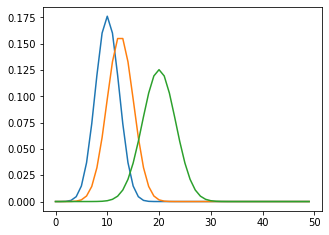

In [189]:
# first, let's plot a few binomial distributions
import numpy as np
from scipy.stats import binom
from matplotlib import pyplot as plt
%matplotlib inline

n_values = [20, 25, 40]
p_values = [0.5, 0.5, 0.5]
x = np.arange(0, 50)

fig, ax = plt.subplots(figsize=(5, 3.75))

for (n, p) in zip(n_values, p_values):
    # create a binomial distribution
    dist = binom(n, p)

    plt.plot(x, dist.pmf(x))

---
## Note--```range()``` or ```arange()```
```range()``` return range object, but ```np.nrange()``` return ```numpy.adarray()```

they both divide evenly
```range()``` can be used in iteration. ```np.arange``` can not only be used in interation but also it can be used as vector.
```range()``` doesn't support float number step. ```np.arange``` support float number step

they have same parameters: ```[first, last)``` or ```[first:step:last)```

## Note--matplotlib ```%matplotlib inline```

[document](https://matplotlib.org/api/pyplot_api.html)

> %matplotlib inline是一个魔法函数（Magic Functions）。官方给出的定义是：IPython有一组预先定义好的所谓的魔法函数（Magic Functions），你可以通过命令行的语法形式来访问它们。


#### 2.2 The birth rate of boys and girls

In real life however, we often get outcomes that are **not** equiprobable. For example, the probability of picking a royal in a deck of cards is not the same as the probability of picking a number. The probability of a child being a girl is not exactly 1/2, and the probability is slightly different for a second child. Give a read to this data science [article](http://people.kzoo.edu/barth/math105/moreboys.pdf) that gives the following *counts* for **two-child** families in Denmark, where `GB` means a family where the first child is a girl and the second a boy:

    GG: 121801    GB: 126840
    BG: 127123    BB: 135138

In [217]:
# Build the Probability dictionary
class ProbDic(dict):
    def __init__(self,mapping=(),**kwargs):
        self.update(mapping,**kwargs)
        # Calculate the probability of each component
        # Make probabilities sum to 1.0; assert no negative probabilities
        total = sum(self.values())
        for outcome in self:
            self[outcome] = self[outcome]/total
            # Make sure the probability is not less than zero
            assert self[outcome] >= 0

In [224]:
def such_that(predicate,space):
    # Get the set that the predication is true
    if isinstance(space, ProbDic):
        return ProbDic({o:space[o] for o in space if predicate(o)})
    else:
        return {o for o in sapce if predicate(o)}
    
is_predicate = callable

# Define the event probability function
def p (event,space):
    # Judge if the event is predicate(transformation)
    if(is_predicate(event)):
        # unroll the event as collection
        event = such_that(event,space)
    
    # if space is not an equiprobably collection (a simple set), 
    # but a probability distribution instead (a dictionary set),
    # then add (union) the probabilities for all favorable outcomes
    if isinstance(space, ProbDic):
        return sum(space[o] for o in space if o in event)
    
    # simplest case: what we played with in our previous lesson
    else:
        return Fraction(len(event & space), len(space))



In [225]:
# All probability of child birth
DK = ProbDic(GG=121801, GB=126840,
              BG=127123, BB=135138)
DK

{'GG': 0.23840384261560926,
 'GB': 0.24826679089140383,
 'BG': 0.24882071317004043,
 'BB': 0.2645086533229465}

In [226]:
# Define all prediacte of child birth
def first_girl(outcome): return outcome[0] == "G"
def second_girl(outcome): return outcome[1] == "G"
def first_boy(outcome): return outcome[0] == "B"
def second_boy(outcome): return outcome[1] == "B"
def both_girl(outcome): return outcome[0]=="G" and outcome[1]=="G"

In [227]:
# Some rate
p(first_girl,DK)

0.4866706335070131

In [228]:
p(second_girl,DK)

0.4872245557856497

In [229]:
p(first_boy,DK)

0.5133293664929869

In [230]:
p(second_boy,DK)

0.5127754442143503

In [231]:
p(both_girl,DK)

0.23840384261560926

The above says that the probability of a girl is somewhere between 48% and 49%, but that it is *slightly different* between the first or second child.

Now answer the question as to whether the sex of the second child is *more likely* or *less likely* to be the same as the first child, by evaluating first:

- The probability of a second girl given that the first child was a girl (a joint probability)
- The probability of a second girl given that the first child was a boy (a joint probability)
- The probability of a second boy given that the first child was a boy (a joint probability)
- The probability of a second boy given that the first child was a girl (a joint probability)

The average of the first two probabilities above represents the probability of a second girl, a [**marginal probability**](https://en.wikipedia.org/wiki/Marginal_distribution) in our problem.

The avergage of the last two probabilities above represents the probability of a second boy, a **marginal probability** in our problem.

In [232]:
p(second_girl,such_that(first_girl,DK)),p(second_girl,such_that(first_boy,DK))

(0.4898669165584115, 0.48471942072973107)

In [233]:
p(second_boy,such_that(first_girl,DK)),p(second_boy,such_that(first_boy,DK))

(0.5101330834415885, 0.5152805792702689)